In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

# Load the dataset
df = pd.read_csv('Unemployment in India.csv')


In [18]:
# Clean column names by removing leading and trailing spaces
df.columns = df.columns.str.strip()


In [22]:

# Data cleaning and preparation
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\salma\AppData\Local\Temp\ipykernel_18192\3463500170.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [26]:
# Display first few rows to understand the data
print(df.head())


           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [28]:
# Check for missing values
if df.isnull().sum().any():
    print("\nMissing values found:")
    print(df.isnull().sum())
else:
    print("\nNo missing values.")



Missing values found:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [30]:
# Basic statistical analysis
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                    

In [32]:
print("\nAverage Unemployment Rate by Region:")
print(df.groupby('Region')['Estimated Unemployment Rate (%)'].mean())



Average Unemployment Rate by Region:
Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64


In [34]:
# Visualization
sns.set_style("whitegrid")


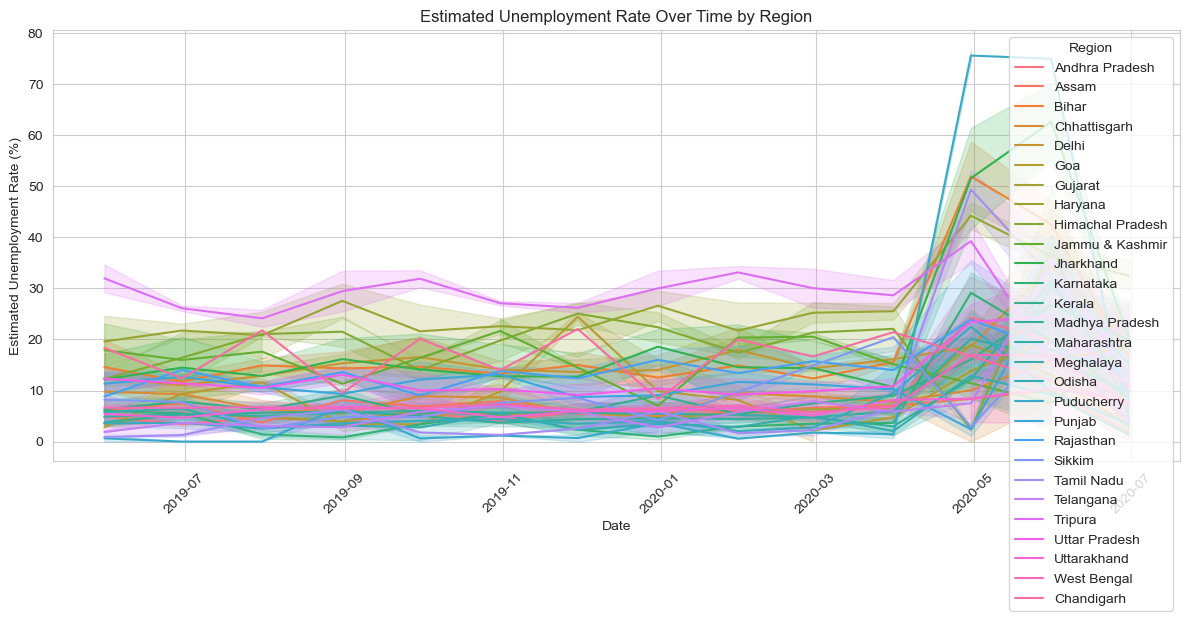

In [36]:
# Plot the unemployment rate over time for different regions
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Estimated Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


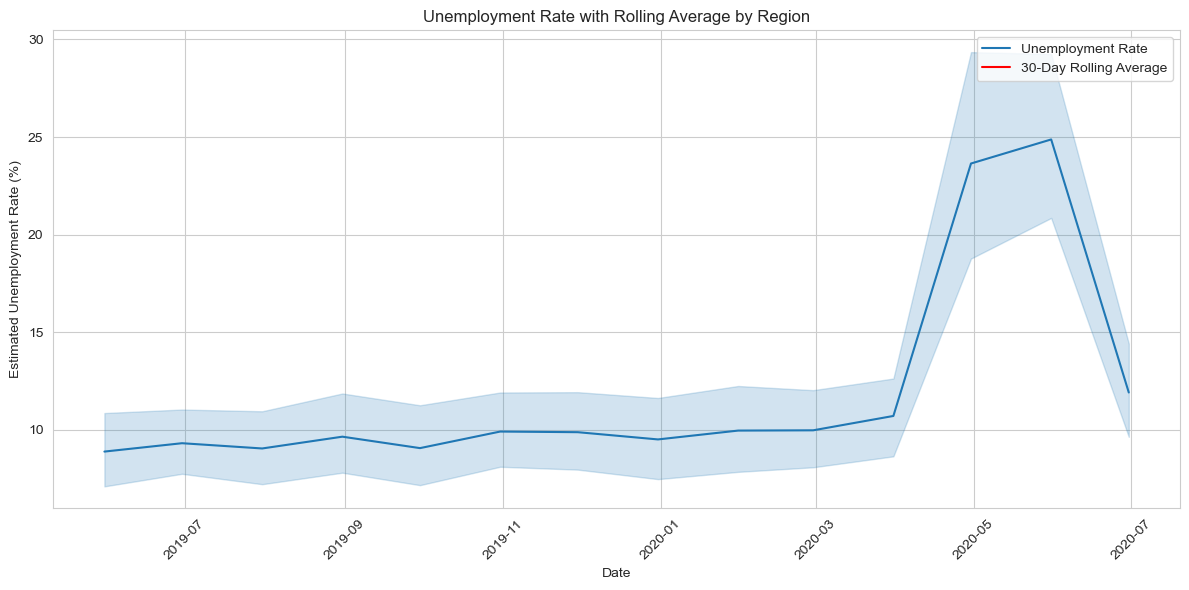

In [38]:
# Rolling average of the unemployment rate for visualization
df['RollingAverage'] = df.groupby('Region')['Estimated Unemployment Rate (%)'].rolling(window=30).mean().reset_index(level=0, drop=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', label='Unemployment Rate')
sns.lineplot(data=df, x='Date', y='RollingAverage', label='30-Day Rolling Average', color='red')
plt.title('Unemployment Rate with Rolling Average by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Analyze other columns if needed
print("\nSummary by Area:")
print(df.groupby('Area')['Estimated Labour Participation Rate (%)'].mean())


Summary by Area:
Area
Rural    44.464819
Urban    40.901365
Name: Estimated Labour Participation Rate (%), dtype: float64
